Check dataflow for siamese networks

In [1]:
# https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

In [2]:
from __future__ import print_function
import os, sys

os.environ['CUDA_VISIBLE_DEVICES'] = '0'

sys.path.append("../submissions")
sys.path.append("..")

from rampwf.workflows.simplified_image_classifier import ImageLoader
from problem import get_cv, get_train_data, get_test_data

In [3]:
folder_X_array, y_array = get_train_data(path="..")
cv = list(get_cv(folder_X_array, y_array))

for fold_i, (train_is, valid_is) in enumerate(cv):

    folder, X_array = folder_X_array
    if train_is is None:
        train_is = slice(None, None, None)

    img_loader = ImageLoader(X_array[train_is], y_array[train_is], folder=folder, n_classes=403)


In [4]:
from pytorch_SqueezeSiameseNet_oneshot_learning.image_classifier import ImageClassifier

HAS_GPU: True


In [7]:
ic = ImageClassifier()
ic.config['batch_size'] = 16

HAS_GPU: True
net.features.0.weight torch.Size([64, 3, 3, 3])
net.features.0.bias torch.Size([64])
net.features.3.squeeze.weight torch.Size([16, 64, 1, 1])
net.features.3.squeeze.bias torch.Size([16])
net.features.3.expand1x1.weight torch.Size([64, 16, 1, 1])
net.features.3.expand1x1.bias torch.Size([64])
net.features.3.expand3x3.weight torch.Size([64, 16, 3, 3])
net.features.3.expand3x3.bias torch.Size([64])
net.features.4.squeeze.weight torch.Size([16, 128, 1, 1])
net.features.4.squeeze.bias torch.Size([16])
net.features.4.expand1x1.weight torch.Size([64, 16, 1, 1])
net.features.4.expand1x1.bias torch.Size([64])
net.features.4.expand3x3.weight torch.Size([64, 16, 3, 3])
net.features.4.expand3x3.bias torch.Size([64])
net.features.6.squeeze.weight torch.Size([32, 128, 1, 1])
net.features.6.squeeze.bias torch.Size([32])
net.features.6.expand1x1.weight torch.Size([128, 32, 1, 1])
net.features.6.expand1x1.bias torch.Size([128])
net.features.6.expand3x3.weight torch.Size([128, 32, 3, 3])
n

In [5]:
import numpy as np

In [6]:
np.random.choice([0, 1, 2, 3], size=1)

array([2])

In [6]:
ic.config

{'batch_size': 16,
 'exp_decay_factor': 0.8765,
 'lr': 0.009876,
 'n_epochs': 15,
 'n_splits': 10,
 'n_tta': 10,
 'nb_test_pairs': 10000,
 'nb_train_pairs': 120000,
 'nb_val_pairs': 10000,
 'num_workers': 12,
 'seed': 12345,
 'val_ratio': 0.1,
 'weight_decay': 0.015}

In [7]:
train_batches, val_batches = ic._get_trainval_pairs(img_loader)

Train pairs: nb_same_pairs=60000 | nb_same_pairs_per_class=149 | nb_diff_pairs=60000 | nb_samples_per_two_classes=1
Val pairs: nb_same_pairs=5000 | nb_same_pairs_per_class=14 | nb_diff_pairs=5000 | nb_samples_per_two_classes=1


In [9]:
len(train_batches), len(val_batches)

(7500, 625)

In [10]:
import matplotlib.pylab as plt
%matplotlib inline

from common.dataflow_visu_utils import _to_ndarray, scale_percentile

torch.Size([16, 3, 299, 299]) torch.Size([16, 3, 299, 299]) torch.Size([16, 1])
torch.Size([16, 3, 299, 299]) torch.Size([16, 3, 299, 299]) torch.Size([16, 1])
torch.Size([16, 3, 299, 299]) torch.Size([16, 3, 299, 299]) torch.Size([16, 1])
torch.Size([16, 3, 299, 299]) torch.Size([16, 3, 299, 299]) torch.Size([16, 1])
torch.Size([16, 3, 299, 299]) torch.Size([16, 3, 299, 299]) torch.Size([16, 1])


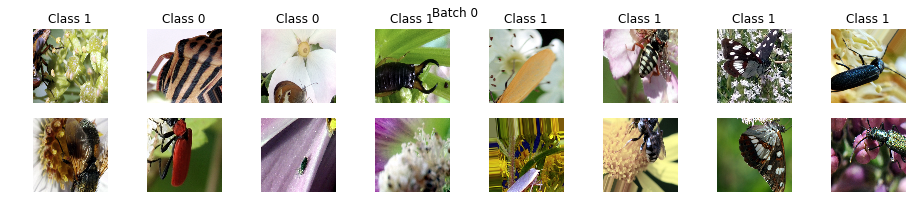

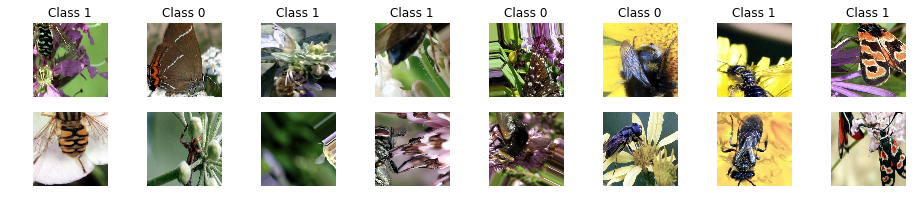

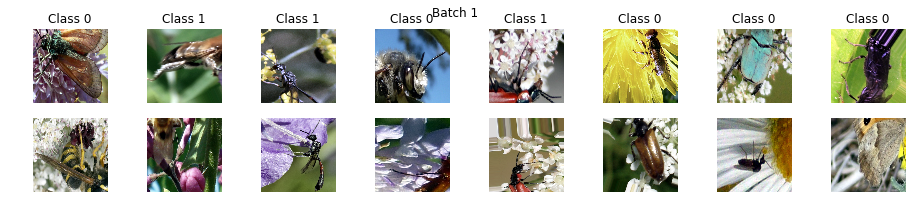

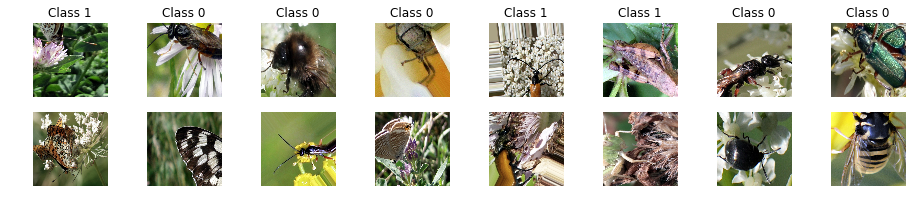

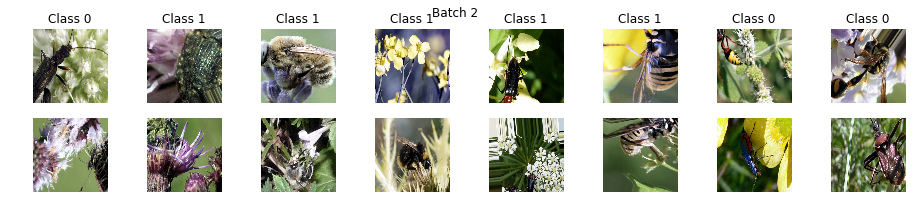

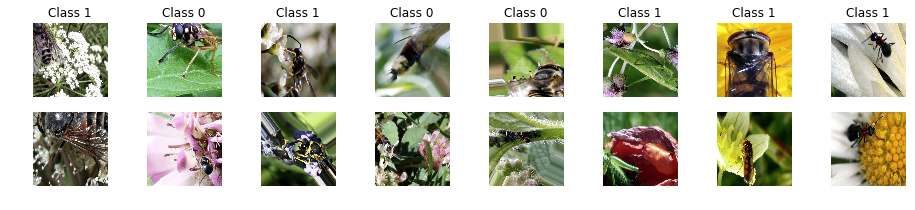

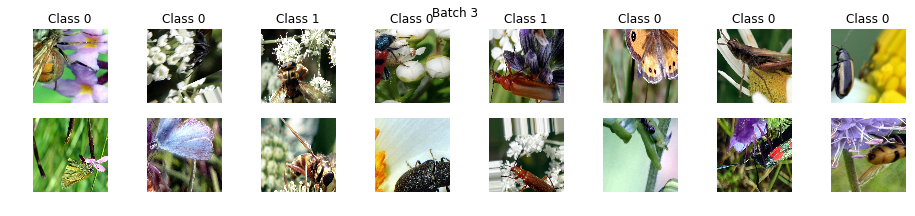

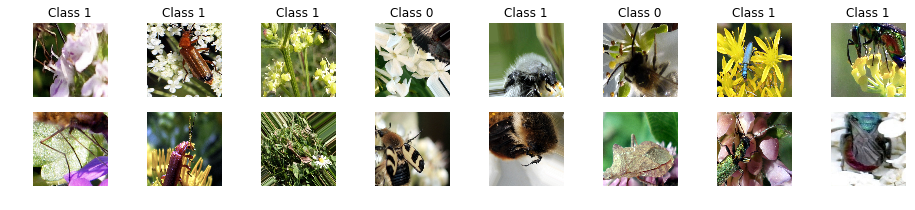

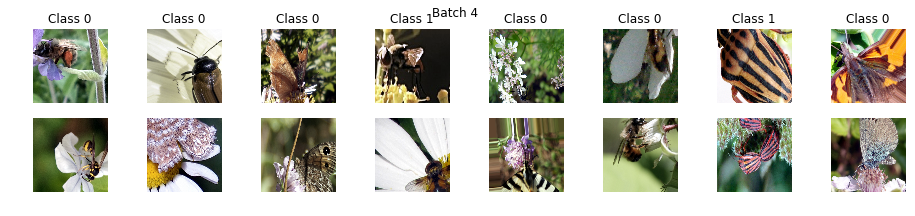

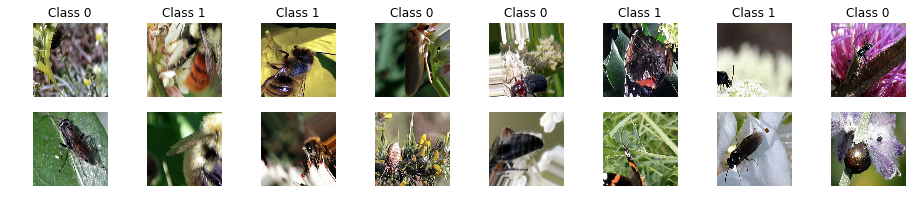

In [11]:
max_datapoints = 5
n_cols = 8
for i, ((batch_x1, batch_x2), batch_y) in enumerate(train_batches):

    print(batch_x1.size(), batch_x2.size(), batch_y.size())
    
    plt.figure(figsize=(16, 3))
    plt.suptitle("Batch %i" % i)
    for j in range(len(batch_x1)):
        if j > 0 and j % n_cols == 0:
            plt.figure(figsize=(16, 3))
        
        x1 = batch_x1[j, ...]
        x2 = batch_x2[j, ...]
        y = batch_y[j, ...]
    
        x1 = _to_ndarray(x1)
        x2 = _to_ndarray(x2)
        
        plt.subplot(2, n_cols, (j % n_cols) + 1)
        plt.imshow(scale_percentile(x1))
        plt.title("Class %i" % int(y[0]))
        plt.axis('off')
        plt.subplot(2, n_cols, (j % n_cols) + 1 + n_cols)
        plt.imshow(scale_percentile(x2))
        plt.axis('off')

    max_datapoints -= 1
    if max_datapoints == 0:
        break

torch.Size([16, 3, 299, 299]) torch.Size([16, 3, 299, 299]) torch.Size([16, 1])
torch.Size([16, 3, 299, 299]) torch.Size([16, 3, 299, 299]) torch.Size([16, 1])
torch.Size([16, 3, 299, 299]) torch.Size([16, 3, 299, 299]) torch.Size([16, 1])
torch.Size([16, 3, 299, 299]) torch.Size([16, 3, 299, 299]) torch.Size([16, 1])
torch.Size([16, 3, 299, 299]) torch.Size([16, 3, 299, 299]) torch.Size([16, 1])


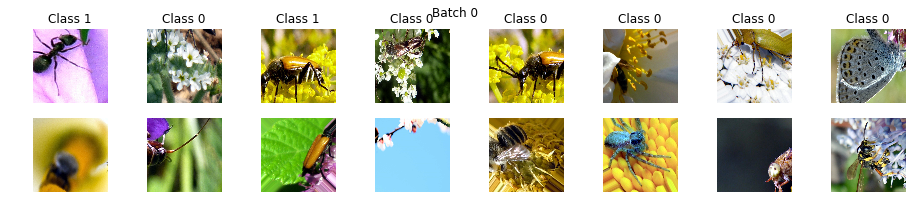

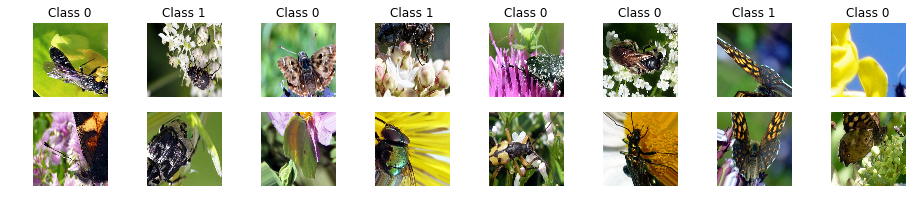

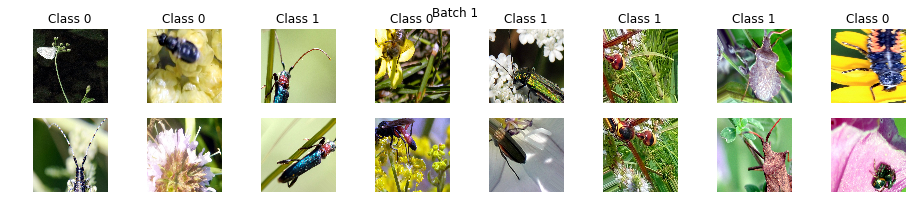

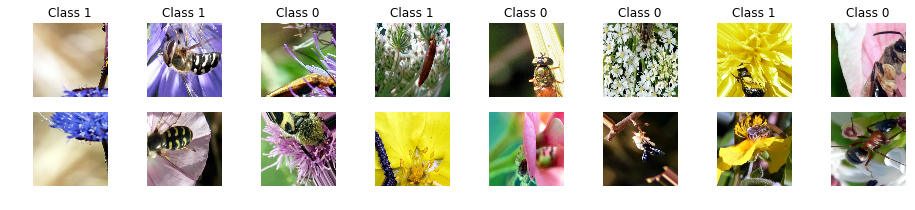

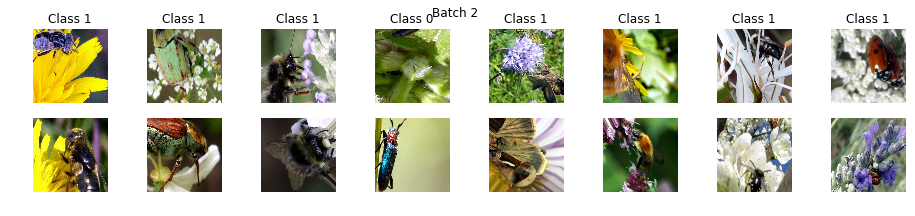

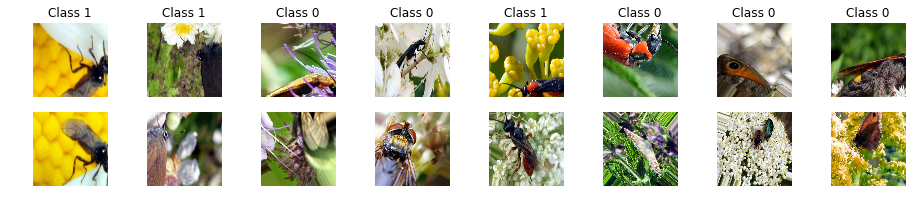

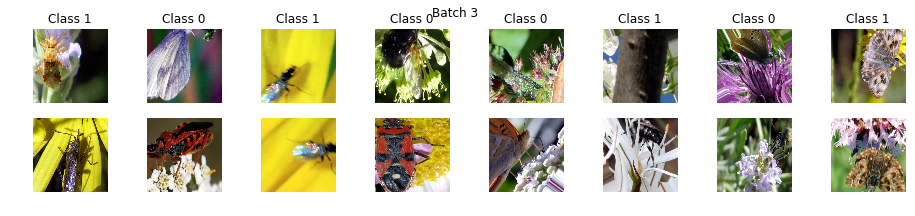

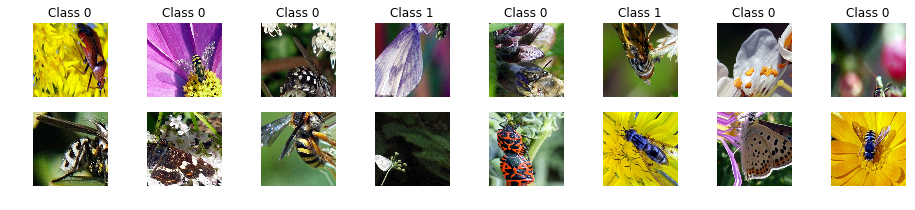

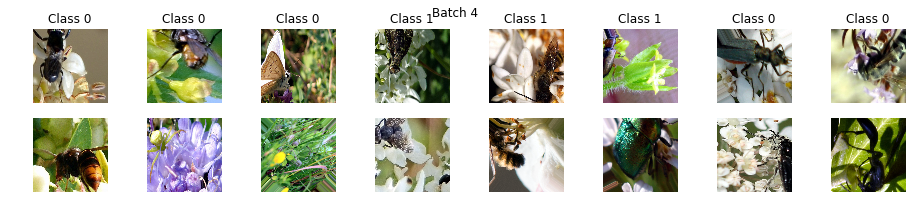

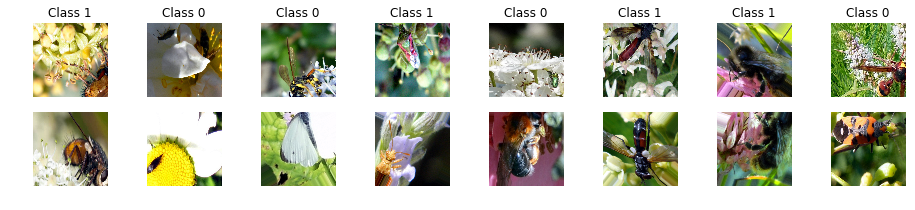

In [12]:
max_datapoints = 5
n_cols = 8
for i, ((batch_x1, batch_x2), batch_y) in enumerate(val_batches):

    print(batch_x1.size(), batch_x2.size(), batch_y.size())
    
    plt.figure(figsize=(16, 3))
    plt.suptitle("Batch %i" % i)
    for j in range(len(batch_x1)):
        if j > 0 and j % n_cols == 0:
            plt.figure(figsize=(16, 3))
        
        x1 = batch_x1[j, ...]
        x2 = batch_x2[j, ...]
        y = batch_y[j, ...]
    
        x1 = _to_ndarray(x1)
        x2 = _to_ndarray(x2)    
        plt.subplot(2, n_cols, (j % n_cols) + 1)
        plt.imshow(scale_percentile(x1))
        plt.title("Class %i" % int(y[0]))
        plt.axis('off')
        plt.subplot(2, n_cols, (j % n_cols) + 1 + n_cols)
        plt.imshow(scale_percentile(x2))
        plt.axis('off')

    max_datapoints -= 1
    if max_datapoints == 0:
        break

In [9]:
ic._setup_support_set_generator(img_loader, transforms=ic._get_train_aug())

In [14]:
import torch

In [15]:
seed = 12345
if seed is not None:
    np.random.seed(seed)
support_set_indices = []        
for y, indices in ic.support_set_class_indices.items():
    index = np.random.randint(len(indices))
    support_set_indices.append(indices[index])
    
support_set_x = []
support_set_y = []
for i in support_set_indices:
    x, y = ic.support_set_ds[i]
    support_set_x.append(x)
    support_set_x.append(y)

support_set_x = torch.cat(support_set_x)
support_set_y = torch.cat(support_set_y)

if HAS_GPU and torch.cuda.is_available():
    support_set_x = support_set_x.cuda()
    support_set_y = support_set_y.cuda()

TypeError: cat received an invalid combination of arguments - got (list), but expected one of:
 * (sequence[torch.FloatTensor] seq)
      didn't match because some of the arguments have invalid types: (!list!)
 * (sequence[torch.FloatTensor] seq, int dim)


In [17]:
support_set[0]

(
 ( 0 ,.,.) = 
   3.5932e-02 -2.1945e-01 -5.0487e-01  ...  -4.7645e-02 -5.6706e-02 -7.2789e-02
   7.3847e-02 -9.1477e-02 -4.8869e-01  ...  -4.0815e-02 -7.9197e-02 -9.4996e-02
   5.8767e-02 -3.9137e-02 -5.1108e-01  ...  -7.0519e-02 -1.3168e-01 -8.0239e-02
                  ...                   ⋱                   ...                
  -1.2704e+00 -1.2558e+00 -1.2706e+00  ...  -2.9985e-01 -7.3021e-01 -7.4026e-01
  -1.2634e+00 -1.2558e+00 -1.2483e+00  ...  -2.1477e-02 -4.6716e-01 -6.6487e-01
  -1.2559e+00 -1.2408e+00 -1.2484e+00  ...   4.5475e-02 -2.6408e-01 -5.2044e-01
 
 ( 1 ,.,.) = 
  -5.1320e-02 -3.4141e-01 -6.5495e-01  ...   3.0001e-02 -2.2766e-02 -6.8210e-02
   1.9414e-03 -1.8882e-01 -6.0215e-01  ...   1.5232e-02 -4.5759e-02 -8.3662e-02
  -6.2239e-03 -1.3532e-01 -6.1779e-01  ...  -7.8846e-03 -9.9409e-02 -7.5827e-02
                  ...                   ⋱                   ...                
  -1.1838e+00 -1.1834e+00 -1.1985e+00  ...  -3.3660e-01 -8.5632e-01 -9.3185e-01
  -1.191

DEBUGING

In [22]:
from pytorch_SqueezeSiameseNet_oneshot_learning.image_classifier import ImageLoaderProxyDataset, ResizedDataset, \
                StratifiedShuffleSplit, SameOrDifferentPairsDataset
from pytorch_SqueezeSiameseNet_oneshot_learning.image_classifier import over_sample
from collections import defaultdict

In [23]:
trainval_ds = ImageLoaderProxyDataset(img_loader)
# Resize to 512x512
trainval_ds = ResizedDataset(trainval_ds, (512, 512))


# Stratified split:
sssplit = StratifiedShuffleSplit(n_splits=ic.config['n_splits'],
                                 test_size=ic.config['val_ratio'],
                                 random_state=ic.config['seed'])
train_indices, val_indices = next(sssplit.split(img_loader.X_array, img_loader.y_array))


train_class_indices = defaultdict(list)
val_class_indices = defaultdict(list)

for i, y in zip(train_indices, img_loader.y_array[train_indices]):
    train_class_indices[y].append(i)

for _, v in train_class_indices.items():
    assert len(v) > 1

for i, y in zip(val_indices, img_loader.y_array[val_indices]):
    val_class_indices[y].append(i)
    
for k, v in val_class_indices.items():
    if len(v) < 2:
        val_class_indices[k].append(v[0])

train_pairs = SameOrDifferentPairsDataset(trainval_ds, class_indices=train_class_indices,
                                          nb_pairs=ic.config['nb_train_pairs'])
val_pairs = SameOrDifferentPairsDataset(trainval_ds, class_indices=val_class_indices,
                                        nb_pairs=ic.config['nb_val_pairs'])

In [26]:
(x1, x2), y = val_pairs[0]

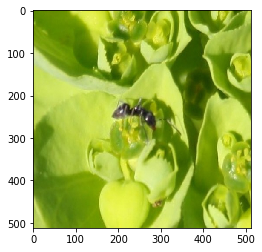

In [27]:
plt.imshow(x2)

In [42]:
len(train_pairs), len(val_pairs)

(60000, 10000)